In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML


In [1]:


student_id = input("Enter your student id")
student_name = input("Enter your name")
print("STUDENT ID", student_id)
print("STUDENT NAME", student_name)


Enter your student id613k0007c
Enter your namepin-yi yu
STUDENT ID 613k0007c
STUDENT NAME pin-yi yu


<!-- <div class="question_frame"> --><!-- start of question_frame -->

<!-- <div class="question_frame"> --><!-- start of question_frame -->

<h1>Harris Corner Detector</h1><div class="question_body"><p>The Harris Corner detector is one of the standard methods fordetecting corners in an image.</p><p>Apply the Harris Corner detector to the image given belowusing the following parameters:</p><table><tbody><tr><td>block size</td><td> 2</td></tr><tr><td>kernel</td><td> 3</td></tr><tr><td>k</td><td> 0.04</td></tr></tbody></table><p>Calculate the number of corner points that will be detected by this procedure.</p><div style="text-align:center"><a download="taiwan_pagodas.png" href="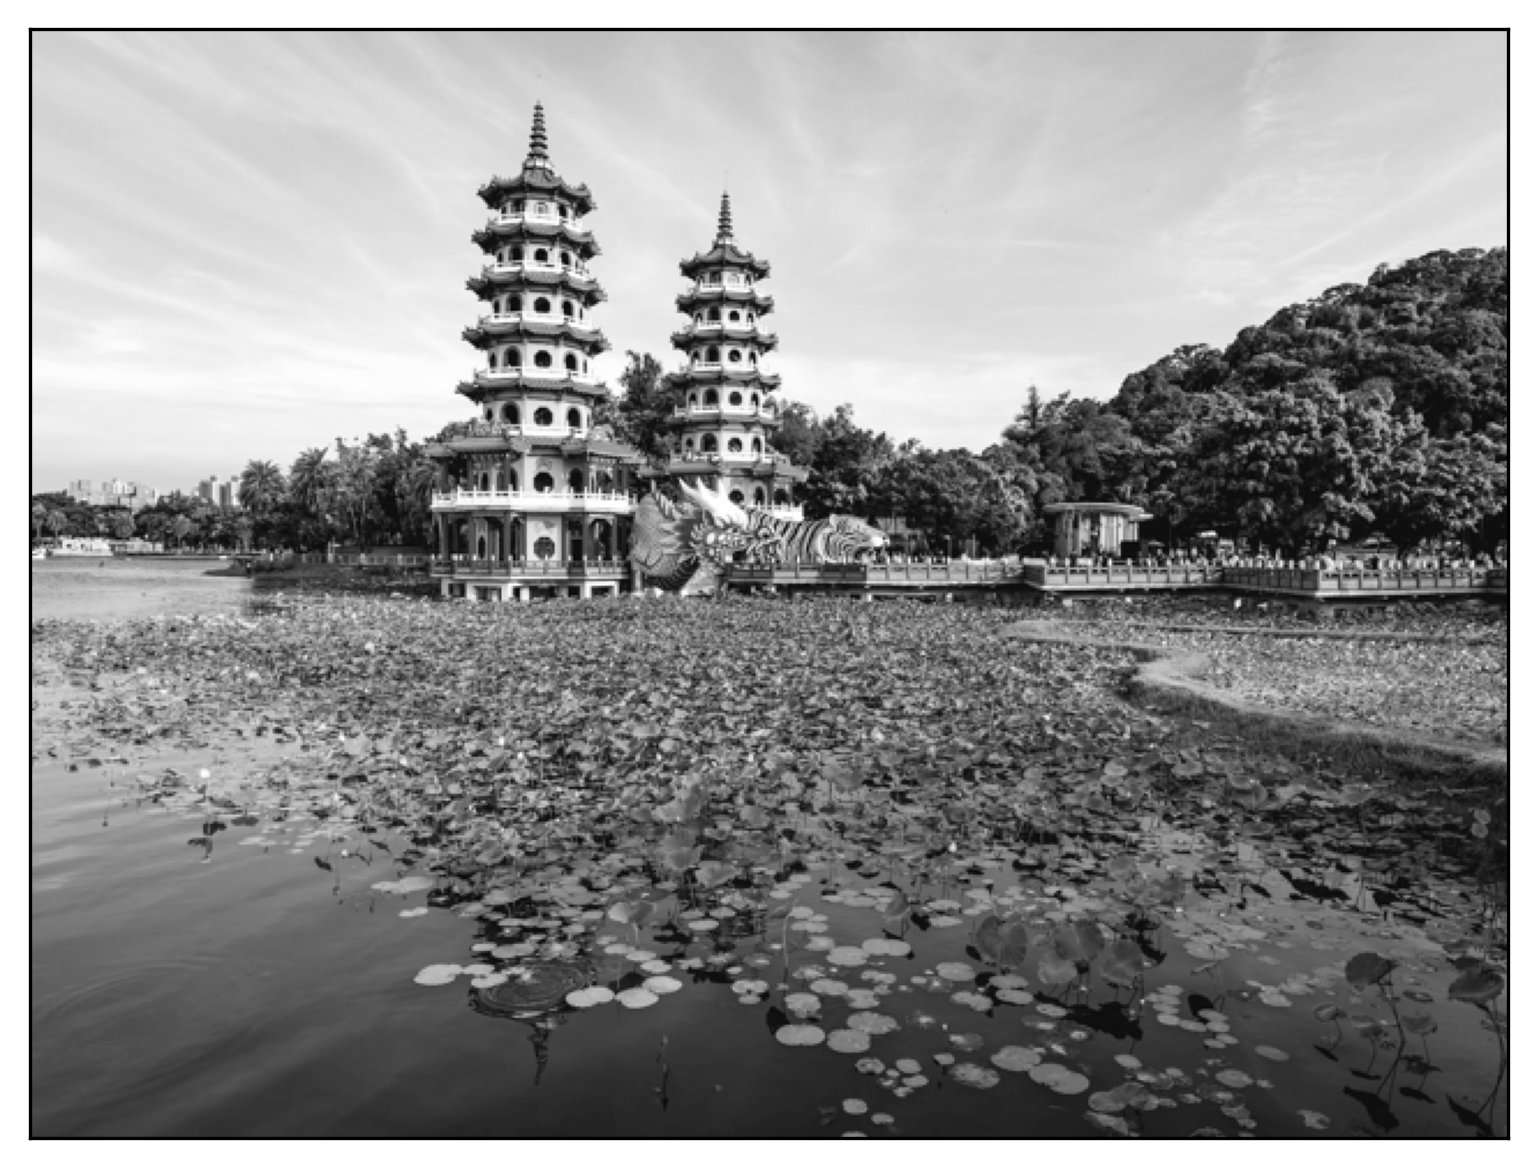">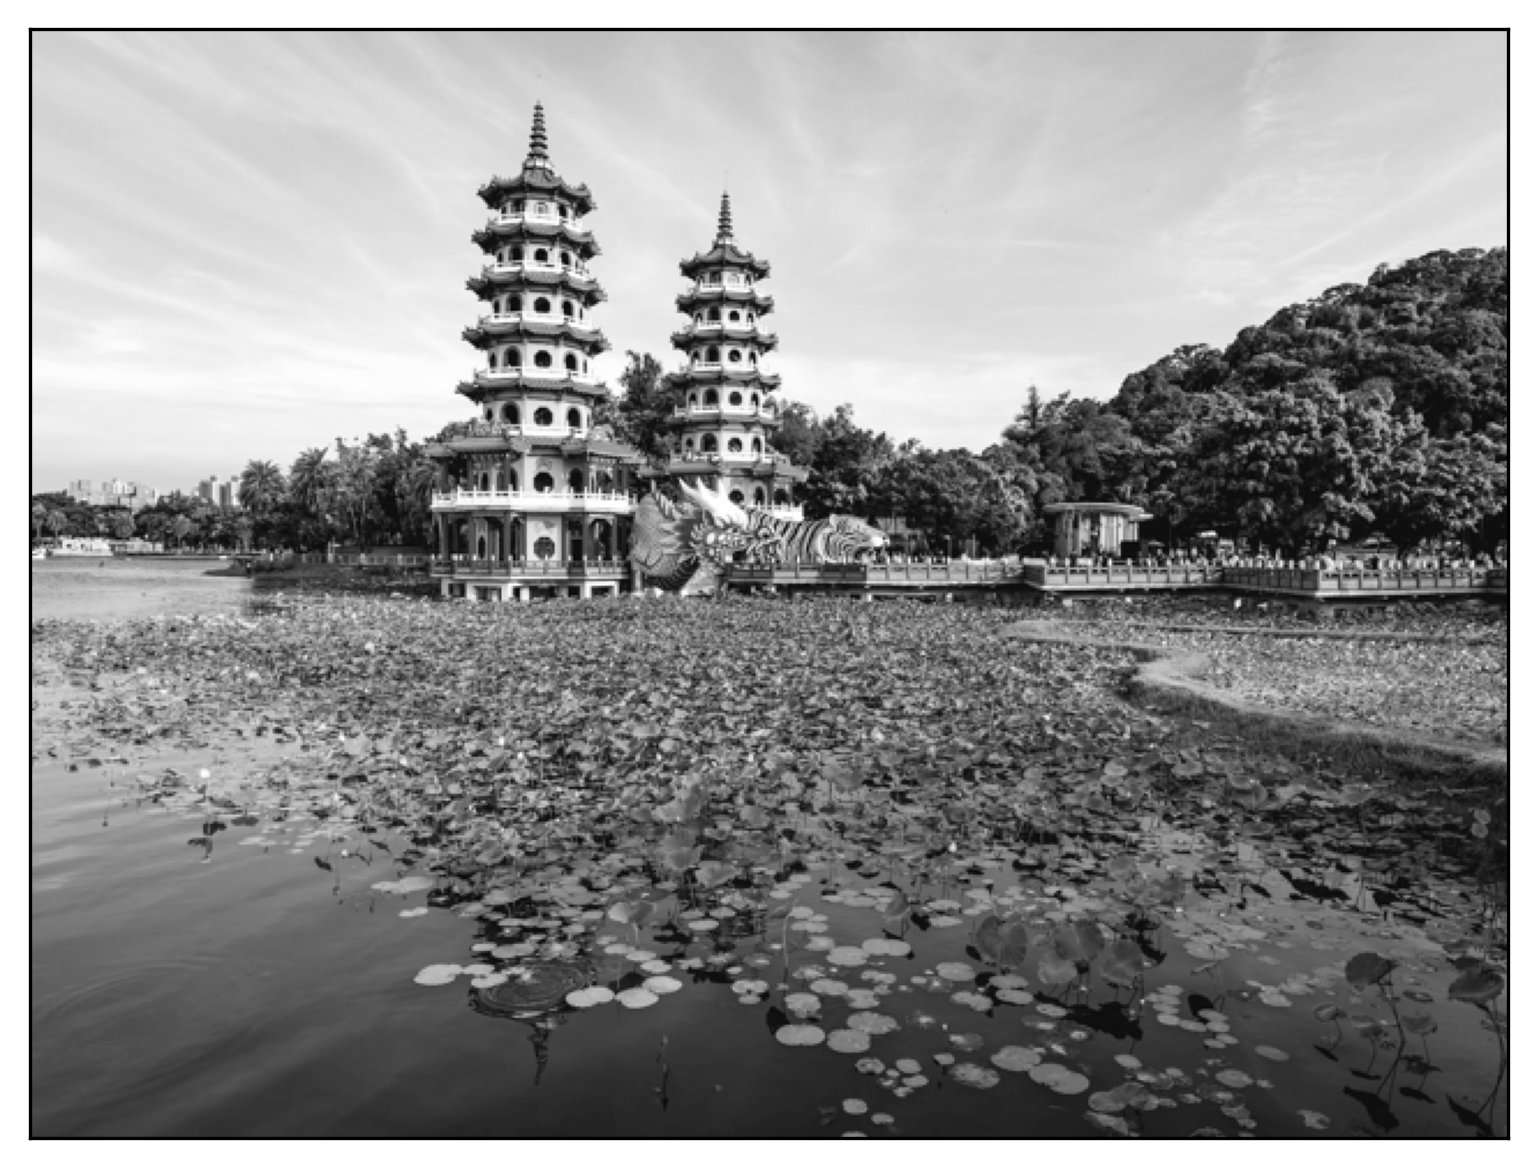</a></div></div><!-- end of question_body -->

<div class="question_marks"><span class="mark_num" style="text-align:right">10</span> marks</div><!-- end of question_marks -->

<p>Number of corners in the output image with a response greater than 0.007:<input type="number"></input></p>

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

<div class="question_marks"><span class="mark_num" style="text-align:right">0</span> marks</div><!-- end of question_marks -->

In [3]:
# Add your code here
from google.colab import files
uploaded = files.upload()  # 這會顯示文件選擇器以供上傳


Saving taiwan_pagodas_sobel.png to taiwan_pagodas_sobel.png


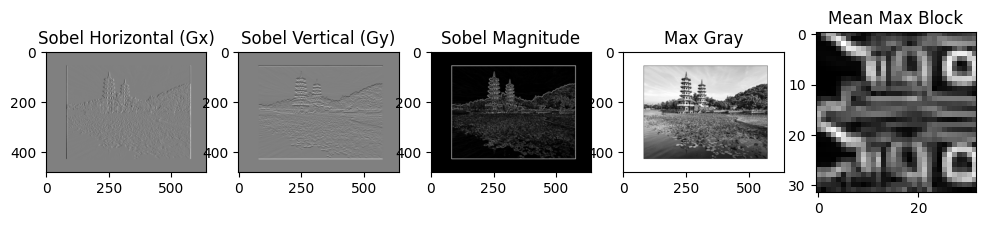

Number of corners with response > 0.007: 307191


In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def Max_gray(rgb_image):
    """
    Convert RGB image to grayscale by taking the maximum value of R, G, B channels.

    Parameters:
        rgb_image (numpy array): RGB image of shape (height, width, 3)

    Returns:
        numpy array: Grayscale image of shape (height, width)
    """
    grayimage = np.max(rgb_image, axis=2)
    return grayimage

def sobel_edge_detec(img):
    """
    Sobel edge detection.
    """
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Compute Sobel gradients
    sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

    # Calculate edge strength
    Sobel_m = np.sqrt(sobel_x**2 + sobel_y**2)  # Square root of sum of squares
    Sobel_m = np.uint8(Sobel_m / np.max(Sobel_m) * 255)  # Normalize to uint8

    return sobel_x, sobel_y, Sobel_m

def get_largest_avg(img, block_size=32):
    """Return the block with the maximum average gradient strength."""
    g = sobel_edge_detec(img)[2]
    height, width = g.shape

    max_avg = 0
    max_block = None

    # Iterate through blocks
    for i in range(0, height - block_size + 1, block_size):
        for j in range(0, width - block_size + 1, block_size):
            block = g[i:i + block_size, j:j + block_size]
            avg = np.mean(block)

            if avg > max_avg:
                max_avg = avg
                max_block = block

    return max_block

def count_corners(img, threshold=0.007):
    """
    Count the number of corners in the image with a response greater than the threshold.
    """
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Detect corners using Harris corner detection
    harris_corners = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Normalize the result to a range of 0 to 1
    harris_corners = cv.normalize(harris_corners, None, 0, 1, cv.NORM_MINMAX)

    # Count corners with response greater than the threshold
    corners_count = np.sum(harris_corners > threshold)

    return corners_count

# Read image (replace with your image path)
img = cv.imread('taiwan_pagodas_sobel.png')

ga = Max_gray(img)
ex, ey, p = sobel_edge_detec(img)
mean32 = get_largest_avg(img, block_size=32)

# Count corners in the image with response > 0.007
corners_number = count_corners(img, threshold=0.007)

# Display results
plt.figure(figsize=(12, 5))
plt.subplot(1, 5, 1)
plt.title("Sobel Horizontal (Gx)")
plt.imshow(ex, cmap="gray")
plt.subplot(1, 5, 2)
plt.title("Sobel Vertical (Gy)")
plt.imshow(ey, cmap="gray")
plt.subplot(1, 5, 3)
plt.title("Sobel Magnitude")
plt.imshow(p, cmap="gray")
plt.subplot(1, 5, 4)
plt.title("Max Gray")
plt.imshow(ga, cmap="gray")
plt.subplot(1, 5, 5)
plt.title("Mean Max Block")
plt.imshow(mean32, cmap="gray")

plt.show()

print(f"Number of corners with response > 0.007: {corners_number}")



<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

<!-- </div> --><!-- end of question_frame -->